In [1]:
#import os

#apt-get -qq update; apt-get install -y python-dev libfftw3-dev libeigen3-dev ffmpeg pybind11-dev
#pip install rmjarvis.eigency>=1.77.1
#pip install galsim --no-cache-dir
import numpy as np
import itertools
import matplotlib.pyplot as plt
%pylab inline
import matplotlib as mpl
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from mpl_toolkits.axes_grid1 import make_axes_locatable

from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

import galsim 
import scipy as sp

# Pre-defined colormap
top = mpl.cm.get_cmap('Oranges_r', 128)
bottom = mpl.cm.get_cmap('Blues', 128)
newcolors = np.vstack((top(np.linspace(0, 1, 128)),
                       bottom(np.linspace(0, 1, 128))))
newcmp = ListedColormap(newcolors, name='OrangeBlue')

Populating the interactive namespace from numpy and matplotlib


In [2]:
altitude = [0, 2.58, 5.16, 7.73, 12.89, 15.46]  # km
r0_500 = 0.12  # m
weights = [0.652, 0.172, 0.055, 0.025, 0.074, 0.022]
speed = np.random.uniform(0, 20, size=6)  # m/s
direction = [np.random.uniform(0, 360)*galsim.degrees for i in range(6)]
npix = 8192
screen_scale = r0_500
atm = galsim.Atmosphere(r0_500=r0_500, r0_weights=weights,
                            screen_size=screen_scale*npix,
                            altitude=altitude, L0=25.0, speed=speed,
                            direction=direction, screen_scale=screen_scale)

In [3]:
psf = atm.makePSF(lam=700.0, exptime=15.0, time_step=0.005, diam=8.4, obscuration=0.6)

In [4]:
img1 = psf.drawImage()

In [17]:
image_size = 51
beta_psf =  4.8 # 4.8# 2.5
pix_scale = 0.187
psf_flux = 1.

rand_shift = np.random.rand(2)-0.5

psf = psf.withFlux(psf_flux)
psf.shear(g1=0.11, g2=-0.08)

noisy_image_epsf = galsim.ImageF(image_size, image_size)
psf.drawImage(image=noisy_image_epsf, offset=rand_shift, scale=pix_scale)

galsim.Image(bounds=galsim.BoundsI(xmin=1, xmax=51, ymin=1, ymax=51), array=
array([[ 4.3264997e-10,  2.3343455e-10,  1.9228645e-10, ...,
        -5.0944987e-10, -3.5291414e-10, -1.1753641e-10],
       [ 1.2766065e-10,  1.7536179e-12,  5.0220414e-08, ...,
         9.4417437e-08,  4.3350170e-08, -2.9341005e-10],
       [ 5.6593903e-11, -2.4567348e-10,  5.2919700e-07, ...,
         1.0138259e-06,  4.6575309e-07, -1.0026503e-10],
       ...,
       [-2.6241545e-10, -7.9467605e-10,  5.1627444e-07, ...,
         9.9965848e-07,  4.5620618e-07,  1.3308527e-10],
       [-4.4687429e-10, -7.6032136e-10, -1.9465527e-09, ...,
        -2.6866189e-09, -1.0804333e-09, -3.3684326e-11],
       [-3.9690276e-10, -7.2193213e-10, -4.8936499e-10, ...,
         7.3942692e-11,  3.0783096e-10,  3.5755177e-10]], dtype=float32), wcs=galsim.PixelScale(0.187))

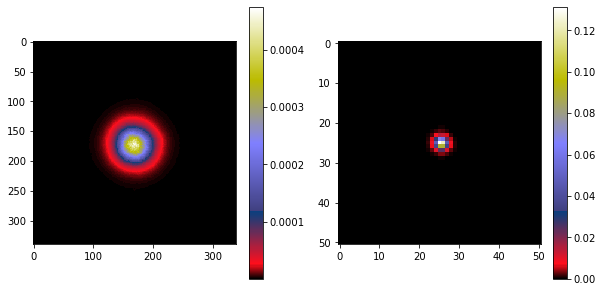

In [18]:
fig = plt.figure(num=0, figsize=(10,10))
plt.subplot(121)
imshow(img1.array, interpolation='None', cmap='gist_stern');colorbar(shrink=0.5)
plt.subplot(122)
imshow(noisy_image_epsf.array, interpolation='None', cmap='gist_stern');colorbar(shrink=0.5)

In [22]:
psf2 = atm.makePSF(lam=700.0, exptime=15.0, time_step=0.005, diam=8.4, obscuration=0.6)

In [23]:
img2 = psf2.drawImage()

In [27]:
psf2 = psf2.withFlux(psf_flux)
psf2.shear(g1=0.11, g2=-0.08)

noisy_image_epsf2 = galsim.ImageF(image_size, image_size)
psf2.drawImage(image=noisy_image_epsf2, offset=rand_shift, scale=pix_scale)

galsim.Image(bounds=galsim.BoundsI(xmin=1, xmax=51, ymin=1, ymax=51), array=
array([[ 4.3264997e-10,  2.3343455e-10,  1.9228645e-10, ...,
        -5.0944987e-10, -3.5291414e-10, -1.1753641e-10],
       [ 1.2766065e-10,  1.7536179e-12,  5.0220414e-08, ...,
         9.4417437e-08,  4.3350170e-08, -2.9341005e-10],
       [ 5.6593903e-11, -2.4567348e-10,  5.2919700e-07, ...,
         1.0138259e-06,  4.6575309e-07, -1.0026503e-10],
       ...,
       [-2.6241545e-10, -7.9467605e-10,  5.1627444e-07, ...,
         9.9965848e-07,  4.5620618e-07,  1.3308527e-10],
       [-4.4687429e-10, -7.6032136e-10, -1.9465527e-09, ...,
        -2.6866189e-09, -1.0804333e-09, -3.3684326e-11],
       [-3.9690276e-10, -7.2193213e-10, -4.8936499e-10, ...,
         7.3942692e-11,  3.0783096e-10,  3.5755177e-10]], dtype=float32), wcs=galsim.PixelScale(0.187))

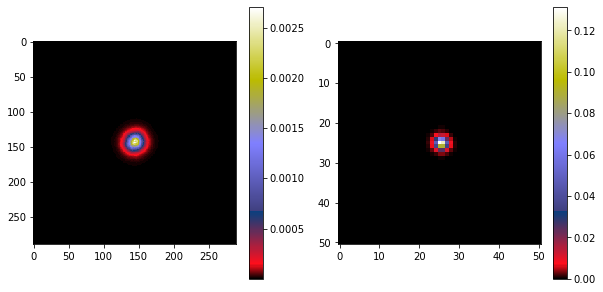

In [28]:
fig = plt.figure(num=0, figsize=(10,10))
plt.subplot(121)
imshow(img2.array, interpolation='None', cmap='gist_stern');colorbar(shrink=0.5)
plt.subplot(122)
imshow(noisy_image_epsf2.array, interpolation='None', cmap='gist_stern');colorbar(shrink=0.5)

In [7]:
psf3 = atm.makePSF(lam=700.0, exptime=15.0, time_step=0.005, diam=8.4, obscuration=0.6)

In [8]:
psf3 = psf3.withFlux(psf_flux)
psf3.shear(g1=0.11, g2=-0.08)

noisy_image_epsf3 = galsim.ImageF(image_size, image_size)
psf3.drawImage(image=noisy_image_epsf3, offset=rand_shift, scale=pix_scale)

galsim.Image(bounds=galsim.BoundsI(xmin=1, xmax=51, ymin=1, ymax=51), array=
array([[4.0528758e-07, 4.1310406e-07, 4.1617923e-07, ..., 4.2037905e-07,
        4.0855372e-07, 3.9784186e-07],
       [4.1146649e-07, 4.2695120e-07, 4.3493122e-07, ..., 4.3269111e-07,
        4.1377419e-07, 4.0629439e-07],
       [4.2239847e-07, 4.3742509e-07, 4.5619430e-07, ..., 4.4506422e-07,
        4.2799334e-07, 4.1482019e-07],
       ...,
       [4.1675202e-07, 4.3110828e-07, 4.4704234e-07, ..., 4.4585650e-07,
        4.2347443e-07, 4.0926676e-07],
       [4.0750592e-07, 4.1445779e-07, 4.2679162e-07, ..., 4.2588718e-07,
        4.1729584e-07, 4.0298113e-07],
       [3.9849371e-07, 4.0463584e-07, 4.0957954e-07, ..., 4.0668192e-07,
        4.0226024e-07, 4.0123072e-07]], dtype=float32), wcs=galsim.PixelScale(0.187))

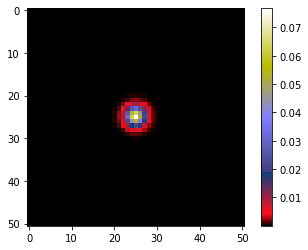

In [12]:
imshow(noisy_image_epsf3.array, interpolation='None', cmap='gist_stern');colorbar()